![](https://img.kaikeba.com/web/kkb_index/img_index_logo.png)

# 人工智能基础课机器学习 第三节课作业 线性回归

同学们大家好，本次作业是考察学生对线性回归的理解与SKLearn的使用，以及pandas的使用。

本次作业的数据集：data.csv
这份数据代表了一个循环发电厂，每个数据有5列，分别是:AT（温度）, V（压力）, AP（湿度）, RH（压强）, PE（输出电力)

问题是得到一个线性的关系，对应PE是样本输出，而AT/V/AP/RH这4个是样本特征， 机器学习的目的就是得到一个线性回归模型，即: PE=W0+W1∗AT+W2∗V+W3∗AP+W4∗RH 而需要学习的，就是W0,W1,W2,W3,W4这5个参数。


In [1]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# 第一步：读取样本数据，并将数据集分为训练集和测试集




In [14]:
df = pd.read_csv(r'data.csv')
x = df[['AT','V','AP','RH']]
y = df[['PE']]
#x.head()
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.3,random_state=12345)
#x_train


2871 2871


#  第二步：训练Linear Regreesion模型，得到训练参数



In [20]:
lr = LinearRegression()
lr.fit(x_train,y_train)
print(lr.coef_[0])
print(lr.intercept_)

[-1.9690502  -0.23601743  0.07068575 -0.15675015]
[445.75181229]


# 第三步：使用均方误差和均方根误差在测试集上的表现来评价模型的好坏。



In [16]:
y_pred = lr.predict(x_test)
n = np.shape(x_test)[0]
print(n)
MSE =(1.0/n) * np.square(y_test-y_pred).sum()
RMSE = MSE ** 0.5
print("MSE" + str(MSE))
print("RMSE" + str(RMSE))

2871
MSEPE    20.579659
dtype: float64
RMSEPE    4.536481
dtype: float64


In [23]:
from sklearn.metrics import mean_squared_error
y_pred = lr.predict(x_test)
MSE = mean_squared_error(y_test,y_pred)
RMSE = MSE ** 0.5
print("MSE: " + str(MSE))
print("RMSE: " + str(RMSE))

MSE: 20.579658576470337
RMSE: 4.536480858162011


# 第四步：可视化的方式直观的表示模型学习效果的好坏



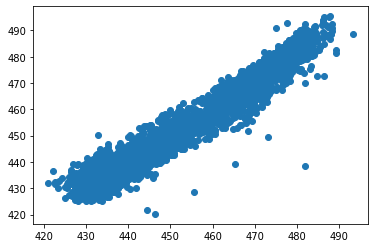

In [31]:
#print(len(x_test),len(y_test),len(y_pred))
plt.scatter(y_pred,y_test)
#plt.plot(y_test,y_pred)
plt.show()